# Exploring features

In [65]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.signal import find_peaks
df = pd.read_csv('../dumps/2020.03.11-17.39.csv')
RED = "#f6546a"
GREEN = "#bada55"

## Features
Caution the numbers are shifted of 1
- Feature 1 : the DLLs characteristics 1
- Feature 2 : the DLLs characteristics 2
- Feature 3 : the DLLs characteristics 3
- Feature 4 : the DLLs characteristics 4
- Feature 5 : the DLLs characteristics 5
- Feature 6 : the DLLs characteristics 6
- Feature 7 : the DLLs characteristics 7
- Feature 8 : the DLLs characteristics 8
- Feature 9 : the Checksum
- Feature 10 : the Image Base
- Feature 11 : the Base of Code
- Feature 12 : the OS Major version
- Feature 13 : the OS Minor version
- Feature 14 : the Size of Image
- Feature 15 : the Size of Code
- Feature 16 : the Headers
- Feature 17 : the Size Of InitializedData
- Feature 18 : the Size Of UninitializedData
- Feature 19 : the Size Of StackReserve
- Feature 20 : the Size of Stack Commit
- Feature 21 : the Section Alignment
- Feature 22 : the number of standards sections the PE holds
- Feature 23 : the number of non-standards sections the PE holds
- Feature 24 : the ratio between the number of standards sections found and the number of all sections found in the PE under analysis
- Feature 25 : the number of Executable sections the PE holds
- Feature 26 : the number of Writable sections the PE holds
- Feature 27 : the number of Writable and Executable sections the PE holds
- Feature 28 : the number of readable and executable sections
- Feature 29 : the number of readable and writable sections
- Feature 30 : the number of Writable and Readable and Executable sections the PE holds
- Feature 31 : the code section is not executable
- Feature 32 : the executable section is not a code section
- Feature 33 : the code section is not present in the PE under analysis
- Feature 34 : the EP is not in the code section
- Feature 35 : the EP is not in a standard section
- Feature 36 : the EP is not in an executable section
- Feature 37 : the EP ratio between raw data and virtual size for the section of entry point
- Feature 38 : the number of sections having their physical size =0 (size on disk)
- Feature 39 : the number of sections having their virtual size greater than their raw data size
- Feature 40 : the maximum ratio raw data per virtual size among all the sections
- Feature 41 : the minimum ratio raw data per virtual size among all the sections
- Feature 42 : the address pointing to raw data on disk is not conforming with the file alignement
- Feature 43 : the entropy of Code/text sections
- Feature 44 : the entropy of data section
- Feature 45 : the entropy of resource section
- Feature 46 : the entropy of PE header
- Feature 47 : the entropy of the entire PE file
- Feature 48 : the entropy of section holding the Entry point (EP) of the PE under analysis
- Feature 49 - 112 : 64 bytes following the EP, each byte for 1 feature position
- Feature 113 : the number of DLLs imported
- Feature 114 : the number of functions imported found in the import table directory (IDT)
- Feature 115 : the number of malicious APIs imported
- Feature 116 : the ratio between the number of malicious APIs imported to the number of all functions imported by the PE
- Feature 117 : the number of addresses (corresponds to functions) found in the import address table (IAT)
- Feature 118 : the debug directory is present or not
- Feature 119 : the number of resources the PE holds

## DLLs characteristics

        f0     f1     f2     f3     f4     f5     f6     f7    f30   f31  \
0.0  11809  14693  11994  14545  13128  14557  14702  10173  13903  9210   
1.0   2894     10   2709    158   1575    146      1   4530    800  5493   

       f32   f33    f34    f35    f41   f117  
0.0  12074  9802  11167  13643  14678   3265  
1.0   2629  4901   3536   1060     25  11438  


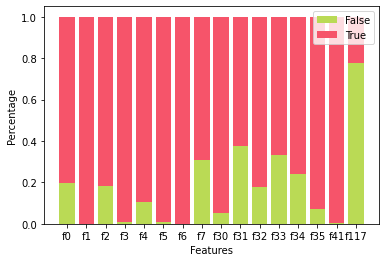

In [66]:
labels = ['f0','f1','f2','f3','f4','f5','f6','f7','f30','f31','f32','f33','f34','f35','f41','f117']
f = df[labels]
arr = f.apply(pd.Series.value_counts)
x_false = arr.iloc[0].tolist()
x_true = arr.iloc[1].tolist()
total = x_false[0] + x_true[0]
x_false = list(map(lambda x: x/total, x_false))
x_true = list(map(lambda x: x/total, x_true))
print(arr)
plt.bar(labels, x_true, color=GREEN, label="False")
plt.bar(labels, x_false, bottom=x_true, color=RED, label="True")
plt.xlabel("Features")
plt.ylabel("Percentage")
plt.legend()
plt.show()

In [67]:
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81368.0,4194304.0,...,179.0,204.0,1.0,113.0,0.0,0.000,114.0,0.0,20.0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,101004.0,4194304.0,...,107.0,192.0,2.0,45.0,0.0,0.000,2.0,0.0,8.0,0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4194304.0,...,0.0,0.0,1.0,0.0,0.0,0.000,1.0,1.0,8.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4194304.0,...,137.0,13.0,7.0,206.0,14.0,0.068,-1.0,1.0,8.0,0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4194304.0,...,0.0,0.0,1.0,0.0,0.0,0.000,1.0,1.0,8.0,0


### Feature 8

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4194304.0,...,179.0,204.0,1.0,113.0,0.0,0.000,114.0,0.0,20.0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4194304.0,...,107.0,192.0,2.0,45.0,0.0,0.000,2.0,0.0,8.0,0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,4194304.0,...,0.0,0.0,1.0,0.0,0.0,0.000,1.0,1.0,8.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4194304.0,...,137.0,13.0,7.0,206.0,14.0,0.068,-1.0,1.0,8.0,0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,4194304.0,...,0.0,0.0,1.0,0.0,0.0,0.000,1.0,1.0,8.0,0


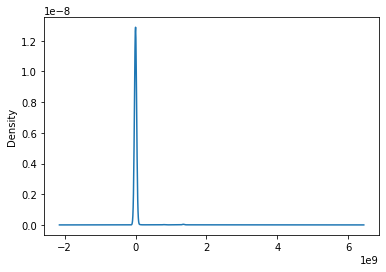

In [68]:
df['f8'].plot.kde()
df['f8'] = df['f8'].apply(lambda x: 0 if x == 0 else 1)
df.head()

### Feature 9
13362 rows have value **4194304**

1    13362
0     1341
Name: f9, dtype: int64


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,...,179.0,204.0,1.0,113.0,0.0,0.000,114.0,0.0,20.0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,...,107.0,192.0,2.0,45.0,0.0,0.000,2.0,0.0,8.0,0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.000,1.0,1.0,8.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,...,137.0,13.0,7.0,206.0,14.0,0.068,-1.0,1.0,8.0,0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.000,1.0,1.0,8.0,0


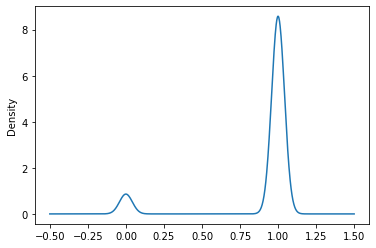

In [70]:
feature = 'f9'
df[feature].plot.kde()
print(df[feature].value_counts())
df[feature] = df[feature].apply(lambda x: 1 if x == 4194304 else 0)
df.head()

### Feature 10
12396 have value 4096 <br>
1112 have value 8192

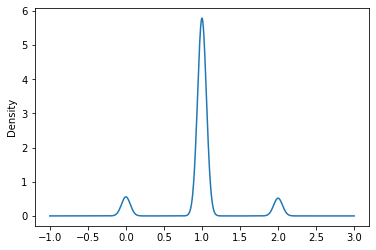

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,...,179.0,204.0,1.0,113.0,0.0,0.000,114.0,0.0,20.0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,...,107.0,192.0,2.0,45.0,0.0,0.000,2.0,0.0,8.0,0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.000,1.0,1.0,8.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,...,137.0,13.0,7.0,206.0,14.0,0.068,-1.0,1.0,8.0,0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.000,1.0,1.0,8.0,0


In [78]:
feature = 'f10'
def cleanF10(x):
    if x == 4096:
        return 1
    elif x == 8192:
        return 2
    return 0
df[feature] = df[feature].apply(cleanF10)
df[feature].plot.kde()
plt.show()
df.head()

### Feature 11
10000 rows have value 4 <br>
3778 rows have value 5

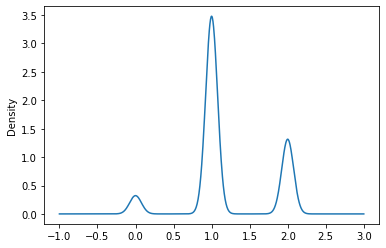

In [81]:
feature = 'f11'
def cleanF11(x):
    if x == 4.0:
        return 1
    elif x == 5.0:
        return 2
    return 0
df[feature] = df[feature].apply(cleanF11)
df[feature].plot.kde()
plt.show()

          f0       f1       f2       f3       f4       f5       f6       f7  \
0.0  11809.0  14693.0  11994.0  14545.0  13128.0  14557.0  14702.0  10173.0   
1.0   2894.0     10.0   2709.0    158.0   1575.0    146.0      1.0   4530.0   
2.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

         f8       f9    f10    f11      f30     f31      f32     f33      f34  \
0.0  9947.0   1341.0   1195    925  13903.0  9210.0  12074.0  9802.0  11167.0   
1.0  4756.0  13362.0  12396  10000    800.0  5493.0   2629.0  4901.0   3536.0   
2.0     NaN      NaN   1112   3778      NaN     NaN      NaN     NaN      NaN   

         f35      f41     f117  
0.0  13643.0  14678.0   3265.0  
1.0   1060.0     25.0  11438.0  
2.0      NaN      NaN      NaN  


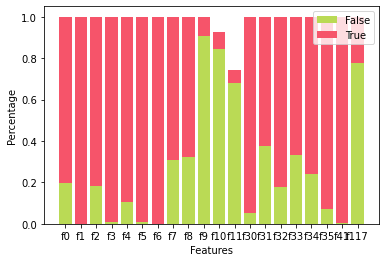

In [84]:
labels = ['f0','f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f30','f31','f32','f33','f34','f35','f41','f117']
f = df[labels]

In [89]:
df = pd.concat([df, pd.get_dummies(df['f10'], prefix='f10')], axis=1)
df.drop(['f10'],axis=1, inplace=True)

In [90]:
print(df)

        f0   f1   f2   f3   f4   f5   f6   f7  f8  f9  ...    f113  f114  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1   1  ...   113.0   0.0   
1      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   1   1  ...    45.0   0.0   
2      1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   0   1  ...     0.0   0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   1  ...   206.0  14.0   
4      1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   0   1  ...     0.0   0.0   
5      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   1  ...     4.0   2.0   
6      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   1  ...    62.0   4.0   
7      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1   1  ...    75.0   6.0   
8      1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   1   1  ...    99.0  10.0   
9      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   1  ...   350.0  15.0   
10     1.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0   0   1  ...     0.0   0.0   
11     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   1  ...     2.0   1.0   
12     1.0  